In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import bagging
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

import joblib

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
%store -r cdc

pd.set_option('display.max_columns', 500)

cdc.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,marijuana,coverage,checkup,primaryphysician,exercise,weeklydrinks,smoker,alcohol,binge,sleep,health,heart_dis,cancer,depression,stroke,diabete3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,asthma,bmi,obese,comorbid,chronic
0,80.0,2.0,1.0,0.0,130.0,64.0,1.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,5.397605e-79,1.0,2.0,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.3,0,0,1
1,33.0,2.0,2.0,0.0,200.0,65.0,2.0,4.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,9.300000e+01,2.0,1.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.3,1,0,0
2,76.0,2.0,1.0,0.0,142.0,58.0,2.0,2.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,5.397605e-79,1.0,2.0,1.0,7.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.7,0,1,1
3,66.0,1.0,1.0,0.0,190.0,70.0,2.0,2.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,5.397605e-79,1.0,2.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.3,0,0,0
4,40.0,2.0,1.0,1.0,175.0,63.0,2.0,4.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,5.397605e-79,1.0,2.0,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,1,0,0


In [4]:
#selecting the target and independent variables

#independent variables
X = cdc.drop(['chronic', 'heart_dis', 'cancer', 'stroke', 'diabete3', 
              'heart_attack', 'skin_cancer', 'chronic_bronchitis', 'kidney_disease', 
              'arthritis', 'comorbid', 'arthritis', 'depression', 'asthma',
              
               'height', 'marijuana', 'exercise', 'education',
             'obese', 'overweight', 'coverage'
                  
              ], axis=1)
#target variable
y = cdc.chronic

X.head()

,age,sex,race,martial,weight,income,home,employment,checkup,primaryphysician,weeklydrinks,smoker,alcohol,binge,sleep,health,bmi
0,80.0,2.0,1.0,0.0,130.0,2.0,1.0,1.0,1.0,1.0,5.397605e-79,1.0,2.0,1.0,7.0,2.0,22.3
1,33.0,2.0,2.0,0.0,200.0,1.0,0.0,1.0,2.0,1.0,9.300000e+01,2.0,1.0,1.0,5.0,3.0,33.3
2,76.0,2.0,1.0,0.0,142.0,1.0,1.0,0.5,1.0,1.0,5.397605e-79,1.0,2.0,1.0,7.0,5.0,29.7
3,66.0,1.0,1.0,0.0,190.0,1.0,1.0,0.5,1.0,1.0,5.397605e-79,1.0,2.0,1.0,6.0,1.0,27.3
4,40.0,2.0,1.0,1.0,175.0,3.0,1.0,1.0,1.0,1.0,5.397605e-79,1.0,2.0,1.0,7.0,2.0,31.0


In [5]:
#scaling data to put data points on a scale of zero to one

scaler = MinMaxScaler()

scaled_cdc = scaler.fit_transform(X)

scaled_cdc_sub = pd.DataFrame(scaled_cdc, columns=X.columns)

scaled_cdc_sub.round(2)

scaled_cdc_sub.head(2)

,age,sex,race,martial,weight,income,home,employment,checkup,primaryphysician,weeklydrinks,smoker,alcohol,binge,sleep,health,bmi
0,1.000000,1.0,0.0,0.0,0.130506,0.333333,1.0,1.0,0.000000,1.0,0.000000,0.0,0.166667,0.0,0.260870,0.25,0.111720
1,0.241935,1.0,0.2,0.0,0.244698,0.000000,0.0,1.0,0.333333,1.0,0.001748,1.0,0.000000,0.0,0.173913,0.50,0.187114


In [6]:
#splitting data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [7]:
#Fitting models to Random Forst calssifier
R_forest = RandomForestClassifier()

R_forest = RandomForestClassifier( n_estimators=300,criterion='gini' , random_state=28)
R_model = R_forest.fit(X_train, y_train)

In [8]:
#saving the model 
with open("random_model.pkl","wb") as Random_model:
    
    joblib.dump(R_model,Random_model, compress=7)
    

In [9]:
#Checking for target variable class size
cdc.chronic.value_counts(normalize=True)

1    0.506186
0    0.493814
Name: chronic, dtype: float64

In [11]:
R_model.score(X_test, y_test)

0.7578223495702006

In [12]:
a = pd.DataFrame(R_model.feature_importances_)

a['features'] = X_train.columns

a.columns = ['importance', 'features']
a = a.sort_values(by='importance', ascending=False)

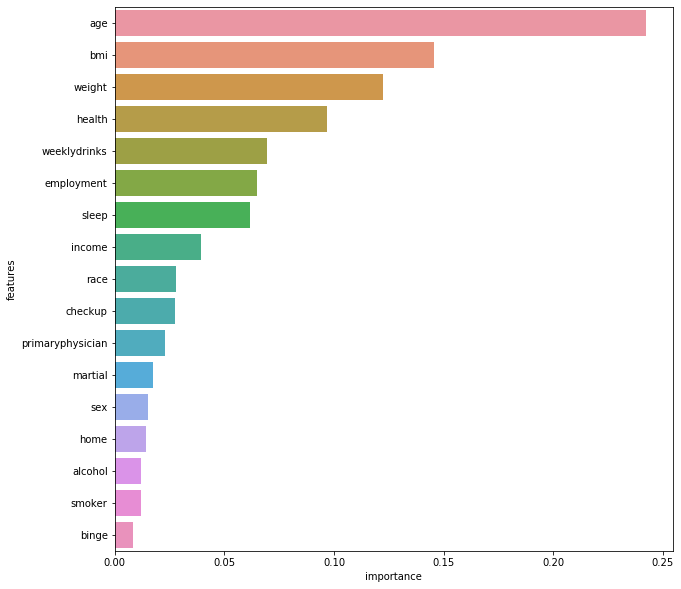

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(a.importance, a.features)

In [14]:
pred = R_model.predict(X_test)

#Confusion matrix and classification report
forest_confusion = confusion_matrix(y_test, pred, normalize='true')
forest_report = classification_report(y_test, pred)

print(forest_confusion)
print(forest_report)

[[0.75591009 0.24408991]
 [0.24031592 0.75968408]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     51649
           1       0.76      0.76      0.76     53051

    accuracy                           0.76    104700
   macro avg       0.76      0.76      0.76    104700
weighted avg       0.76      0.76      0.76    104700



In [15]:
forest_confusion = forest_confusion.round(2)
forest_confusion

array([[0.76, 0.24],
       [0.24, 0.76]])

In [16]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (11,7), fontsize=19):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize )
    try:
        heatmap = sns.heatmap(df_cm, annot=True, cmap='YlGnBu')
        sns.set(font_scale=2)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('Predicted label', fontsize=13)
    
    return fig


forest_classes = forest_classes

print_confusion_matrix(forest_confusion, forest_classes, figsize =(11,7), fontsize=15, )


NameError: name 'forest_classes' is not defined

In [ ]:

forest_classes  = ['yes', 'no']